### Imports and "global variables" definition

In [16]:
import json
import collections as c
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import import_ipynb
import UserBuilder

ans_dict = {"A":0, "B":1, "C":2, "D":3, "E":4}
graphs_path = "./graphs/"

### Functions definition
This function gets the frequency of labels in an answer for all the answers and the "correct answer" rate.<br>
It takes a series of users and return a tuple of frequencies of answers and correct rates per answer.

In [2]:
def freqsNrates(userseries):
    answers_freqs = []
    answers_rates = []
    #for index in range(len(users_factory.users_built[0].))
    for index in (userseries[0].questions_dict).keys():
        freqs, rates = filtered_users.answers_freqs(index, userseries)
        answers_freqs.append(freqs)
        answers_rates.append(rates)
    return answers_freqs, answers_rates

### Json dataset opening
Also checking the length of the survey elements

In [3]:
with open('dataset.json', 'r') as f:
    survey = json.load(f)

In [4]:
len(survey)

56

### Instantiating the a UserBuilder object
Making it build a series of users and returns itself at each iteration.<br>
If for some reason a survey is broken, it eliminates it and goes on.

In [5]:
users_factory = UserBuilder.UserBuilder()

In [6]:
for index in range(len(survey)):
    try:
        users_factory, _ = users_factory.survey_parser(survey[index])
    except:
        print(index)
        pass

21
34
50


### Instantiating an object that is basically the list of users built by the factory
From there, it filters the attentive users that answered correctly at the attention check.<br>

In [7]:
userseries = users_factory.users_built

In [8]:
userseries_attentive = ([x for x in (filter(lambda user: not(user.distracted), userseries))])

In [11]:
#filtered_users = UserBuilder.UserBuilder()

### Comparison of flist of attentive users and list of all users

In [12]:
all_freqs, all_rates = freqsNrates(userseries)
attentive_freqs, attentive_rates = freqsNrates(userseries_attentive)
all_freqs == attentive_freqs

False

#### Percentage of right answers in attentive users and all users

In [13]:
np.mean(all_rates)

0.3784683684794673

In [14]:
np.mean(attentive_rates)

0.4226006191950464

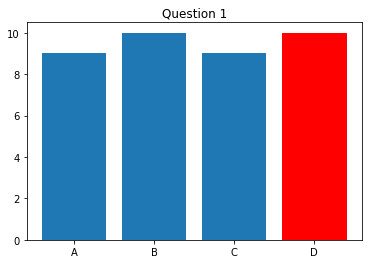

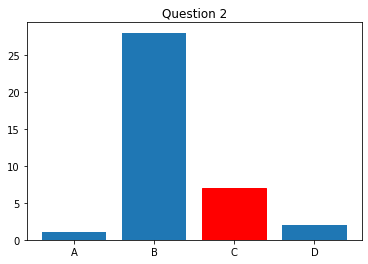

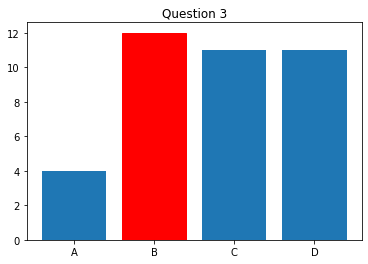

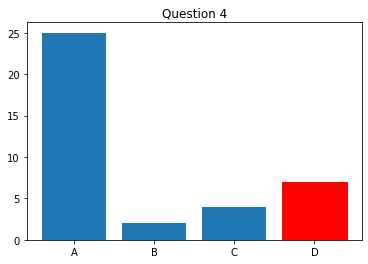

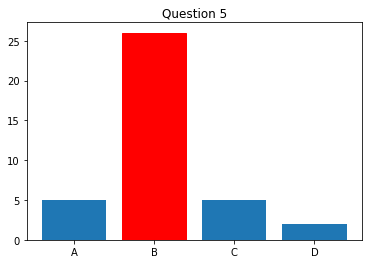

5


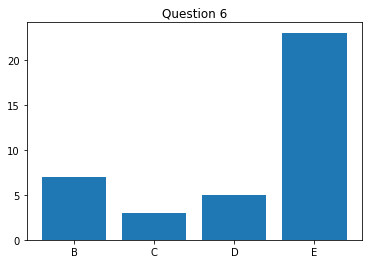

6


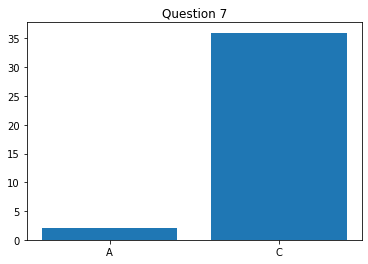

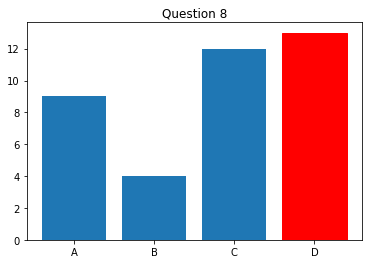

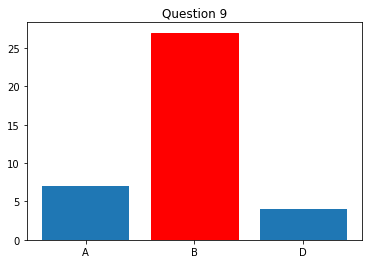

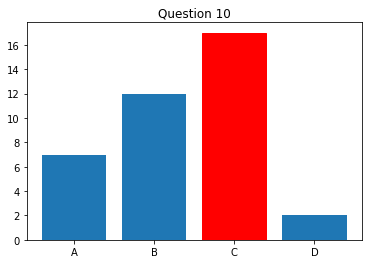

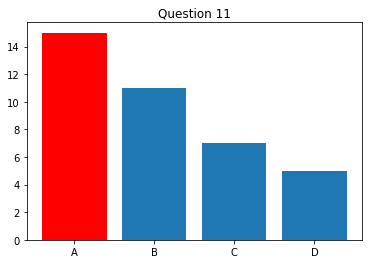

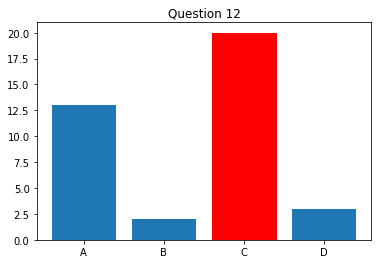

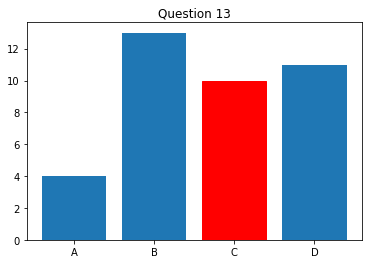

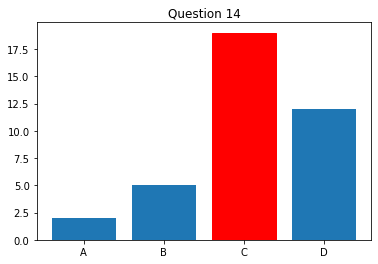

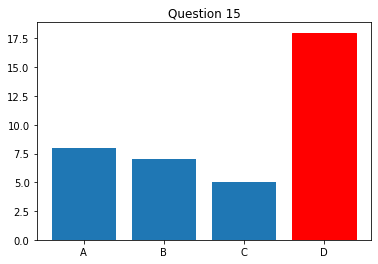

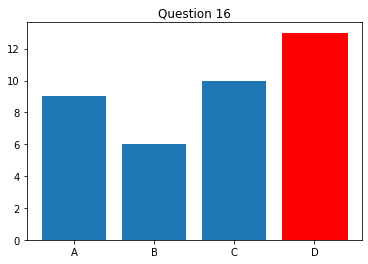

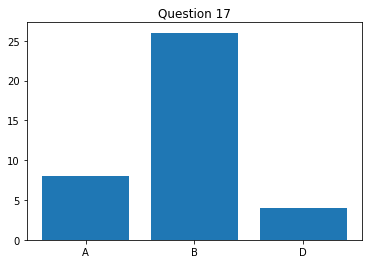

In [16]:
for answers in range(len(answers_freqs)):
    w = c.Counter(answers_freqs[answers])
    plt.title("Question {}".format(answers + 1))
    barlist = plt.bar(w.keys(), w.values())
    ## Calculate 
    if answers+1 != 17:
        try:
            barlist[ans_dict[UserBuilder.correct_answers[answers+1]]].set_color("r")
        except:
            print(answers)
            pass
    plt.show()

(array([[11.,  0., 12.,  0.,  0., 12.,  0., 18.,  0.,  0.],
        [ 2.,  0., 34.,  0.,  0., 12.,  0.,  5.,  0.,  0.],
        [ 6.,  0., 15.,  0.,  0., 18.,  0., 14.,  0.,  0.],
        [30.,  0.,  5.,  0.,  0.,  8.,  0., 10.,  0.,  0.],
        [ 8.,  0., 34.,  0.,  0.,  8.,  0.,  3.,  0.,  0.],
        [ 3.,  0., 10.,  0.,  0.,  4.,  0.,  9.,  0., 27.],
        [15.,  0.,  0.,  0.,  0., 37.,  0.,  1.,  0.,  0.],
        [15.,  0.,  5.,  0.,  0., 17.,  0., 16.,  0.,  0.],
        [14.,  0., 28.,  0.,  0.,  1.,  0., 10.,  0.,  0.],
        [11.,  0., 16.,  0.,  0., 21.,  0.,  5.,  0.,  0.],
        [17.,  0., 13.,  0.,  0.,  9.,  0., 14.,  0.,  0.],
        [19.,  0.,  2.,  0.,  0., 26.,  0.,  6.,  0.,  0.],
        [ 8.,  0., 17.,  0.,  0., 17.,  0., 11.,  0.,  0.],
        [ 6.,  0.,  6.,  0.,  0., 22.,  0., 19.,  0.,  0.],
        [14.,  0., 10.,  0.,  0.,  8.,  0., 21.,  0.,  0.],
        [ 9.,  0., 11.,  0.,  0., 13.,  0., 20.,  0.,  0.],
        [15.,  0., 32.,  0.,  0.,  2.,  

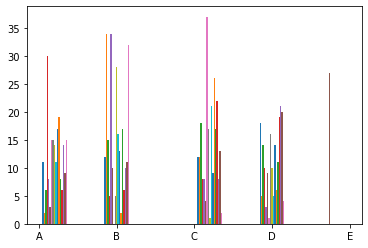

In [46]:
plt.hist(average_times)

In [46]:

px.histogram(builder.answers_freqs(1), labels={
    "value": "Answer",
    "count": "Count"
}, title="Answer 1").show()

(array([45.,  8.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
        218.8, 243. ]),
 <a list of 10 Patch objects>)

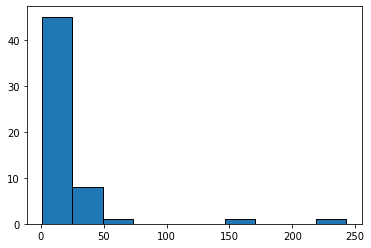

In [35]:
plt.hist(average_times, histtype="bar", ec="black")

In [24]:
np.mean(np.asarray(average_times))

25.5

In [25]:
question = 1
for item in survey[3]["userresponse"]:
    print("Question: ", item.keys())
    #.keys()

Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['qu

In [26]:
{key: value for key,value in survey[0]["userdata"]["personal"].items() if key != "email"}

{'dev_exp': '2',
 'corrected_vision': 'Normal Vision',
 'color_blind': 'No',
 'language': 'Chinese',
 'usage': ['Laptop'],
 'gender': 'Female',
 'agree': True}